In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
papers = pd.read_csv('papers.csv', index_col=0)
papers

,title,cited_by,year
0,Optimal control analysis of a mathematical mod...,20,2018
1,Modeling combination therapy for breast cancer...,26,2018
2,Serum upar as biomarker in breast cancer recu...,8,2016
3,Consolidated mathematical growth model of the...,5,2018
4,Analysis of a breast cancer mathematical model...,0,2020
...,...,...,...
486,Network modularity and hierarchical structure ...,8,2018
487,Validating a breast cancer score in Spanish w...,5,2018
488,Towards breast cancer rotational radiotherapy ...,1,2016
489,"NCCN guidelines insights: breast cancer, versi...",256,2017


In [3]:
tweet_counts = []
for title in papers.title:
    title_comm = '"'+ title + '"'
    tweet_ids = !snscrape twitter-search {title_comm}
    tweet_count = len(tweet_ids)
    tweet_counts.append(tweet_count)

In [24]:
papers['tweeted_by'] = tweet_counts
papers.to_csv('papers+.csv')

In [18]:
papers

,title,cited_by,year,tweeted_by
0,Optimal control analysis of a mathematical mod...,20,2018,0
1,Modeling combination therapy for breast cancer...,26,2018,4
2,Serum upar as biomarker in breast cancer recu...,8,2016,2
3,Consolidated mathematical growth model of the...,5,2018,2
4,Analysis of a breast cancer mathematical model...,0,2020,0
...,...,...,...,...
486,Network modularity and hierarchical structure ...,8,2018,0
487,Validating a breast cancer score in Spanish w...,5,2018,3
488,Towards breast cancer rotational radiotherapy ...,1,2016,0
489,"NCCN guidelines insights: breast cancer, versi...",256,2017,2


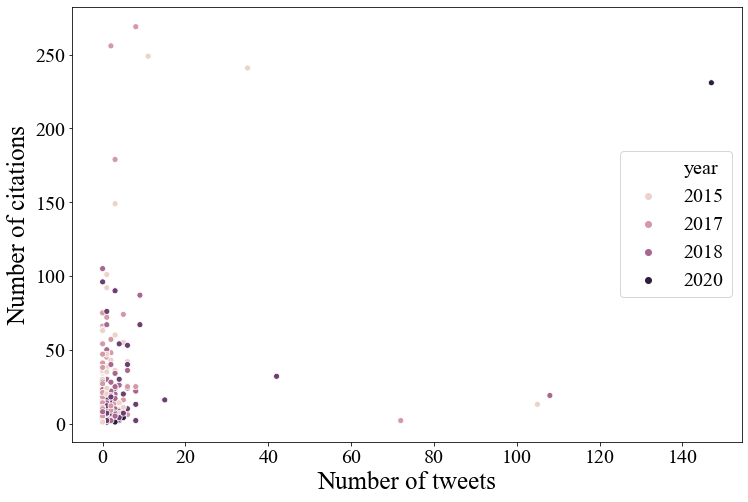

In [54]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
papers_1 = papers[papers.cited_by<500]
papers_2 = papers_1[papers_1.year>2000]
papers_3 = papers_2[papers_2.cited_by>0]
sns.scatterplot(data=papers_3, x='tweeted_by', y='cited_by', hue='year')
#ax.set_xlim(xmin=-.1, xmax=10)
#ax.set_ylim(ymin=0, ymax=100)
plt.xlabel('Number of tweets', fontsize=25)
plt.ylabel('Number of citations', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='right', fontsize=20)

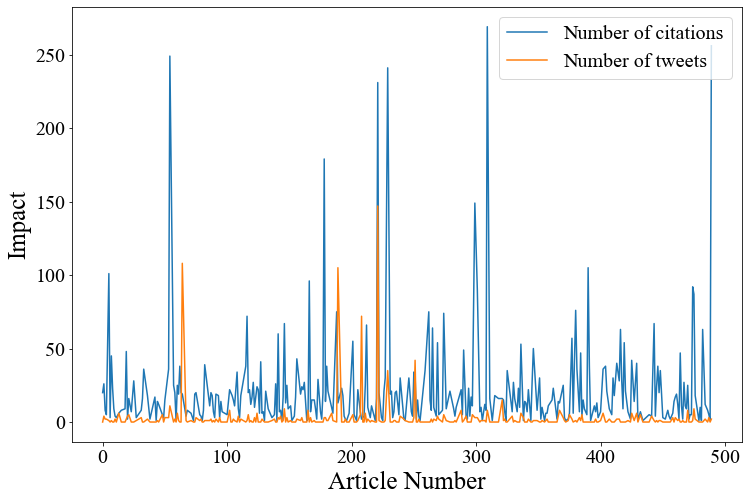

In [30]:
fig = plt.figure(figsize=(12, 8))
width = 1
#plt.bar(papers_3.index, papers_3.cited_by, width=width)
#plt.bar(papers_3.index + width/2, papers_3.tweeted_by, width=width)
plt.plot(papers_3.index, papers_3.cited_by)
plt.plot(papers_3.index, papers_3.tweeted_by)
plt.legend(['Number of citations', 'Number of tweets'], loc='upper right', fontsize=20)
plt.xlabel('Article Number', fontsize=25)
plt.ylabel('Impact', fontsize=25)
plt.tick_params(axis='both', labelsize=20)

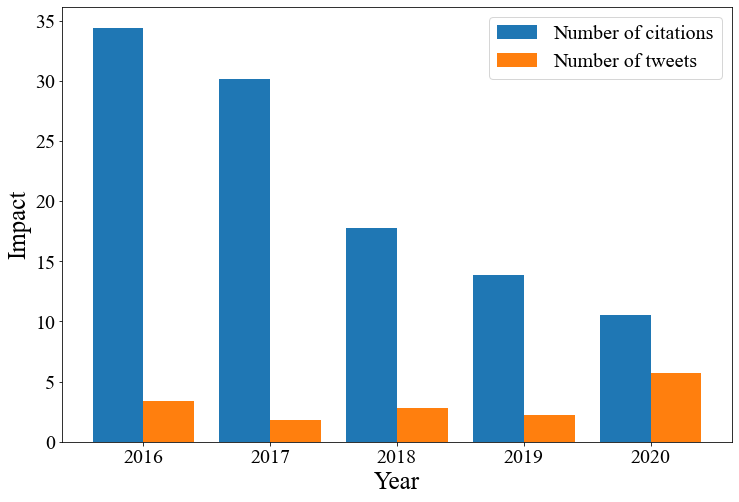

In [53]:
years = np.arange(2016, 2021)
fig = plt.figure(figsize=(12, 8))
width=0.4
plt.bar(years-width/2, papers_3.groupby('year').cited_by.mean(), width)
plt.bar(years+width/2, papers_3.groupby('year').tweeted_by.mean(), width)
plt.legend(['Number of citations', 'Number of tweets'], loc='upper right', fontsize=20)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Impact', fontsize=25)
plt.tick_params(axis='both', labelsize=20)

In [40]:
papers_3.groupby('year').cited_by.mean()

year
2016    34.416667
2017    30.111111
2018    17.782051
2019    13.833333
2020    10.533333
Name: cited_by, dtype: float64

C:\Users\Victiny\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='year', ylabel='ratio'>

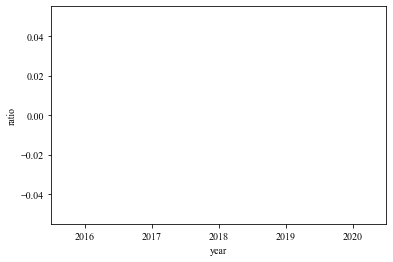

In [53]:
papers_2.loc[:,'ratio'] = papers_2.loc[:,'cited_by']/papers_2.loc[:,'tweeted_by']
sns.barplot(data=papers_2, y='ratio', x='year')

In [54]:
papers_2

,title,cited_by,year,tweeted_by,ratio
0,Optimal control analysis of a mathematical mod...,20,2018,0,inf
1,Modeling combination therapy for breast cancer...,26,2018,4,6.500000
2,Serum upar as biomarker in breast cancer recu...,8,2016,2,4.000000
3,Consolidated mathematical growth model of the...,5,2018,2,2.500000
4,Analysis of a breast cancer mathematical model...,0,2020,0,NaN
...,...,...,...,...,...
486,Network modularity and hierarchical structure ...,8,2018,0,inf
487,Validating a breast cancer score in Spanish w...,5,2018,3,1.666667
488,Towards breast cancer rotational radiotherapy ...,1,2016,0,inf
489,"NCCN guidelines insights: breast cancer, versi...",256,2017,2,128.000000
